## IMPORT LIBRARIES

In [1]:
import pandas as pd
import json
import re
from unidecode import unidecode
import nltk

In [2]:
from nltk.corpus import stopwords
from wordcloud import WordCloud


## LOAD BASES

In [4]:
path = "../data/data_music_neg_clean.json"
f = open(path)
data_json = json.load(f)
data_json.keys()

dict_keys(['Garota de Ipanema', 'Águas de Março', 'Samba De Uma Nota Só', 'Samba de Avião', 'Querida', 'Desafinado', 'Chovendo Na Roseira', 'Passarim', 'Favela', 'Chega de Saudade', '’S Wonderful', 'Besame mucho', 'Meditação', 'Estate', 'Brigas, Nunca Mais', 'Maria Ninguém', 'Ho-Bá-Lá-Lá', 'Bim Bom', 'Você e Eu', 'Sorriu para mim', 'É Luxo Só', 'Águas De Março', 'Saudade Fêz Um Samba', 'Samba da minha Terra', 'Izaura', 'Doralice', 'Morena Boca de Ouro', 'Amor Certinho', 'Pra Machucar Meu Coração', 'Bahia Com H', 'Construção', 'Cálice', 'Cotidiano', 'Apesar de Você', 'Tua Cantiga', 'João e Maria', 'Roda-Viva', 'Dueto', 'As Caravanas', 'Deus Lhe Pague', 'Essa Moça Tá Diferente', 'Geni e o Zepelim', 'Valsinha', 'A Banda', 'Construcción (Construção)', 'O Meu Guri', 'Minha História (Gesubambino)', 'O Que Será (A Flor Da Pele)', 'Cordão', 'Meu Caro Amigo', 'Jorge Maravilha', 'Quem Te Viu, Quem Te Vê', 'Samba e Amor', 'Feijoada Completa', 'Que Tal Um Samba?', 'O Que Será? (À Flor da Terra)', 

In [5]:
base_pos = pd.DataFrame.from_dict(data_json, orient='index')
base_pos.reset_index(inplace=True)
base_pos.columns = ["Musica", "Letra"]
print(base_pos.shape)
base_pos.head()

(1689, 2)


,Musica,Letra
0,Garota de Ipanema,olha que coisa mais linda mais cheia de graça ...
1,Águas de Março,"pau, pedra, o fim do caminho um resto de toco,..."
2,Samba De Uma Nota Só,eis aqui este sambinha feito numa nota só outr...
3,Samba de Avião,minha alma canta vejo o rio de janeiro estou m...
4,Querida,"longa é a tarde, longa é a vida de tristes flo..."


In [6]:
base_pos.isnull().sum()

Musica    0
Letra     0
dtype: int64

In [7]:
## Check if we have duplicated lyrics

filtro_duplicated = base_pos.duplicated(subset=["Letra"], keep="first")
base_pos[filtro_duplicated]["Letra"].values

array(['ô canoeiro bota rede bota rede no mar ô canoeiro bota rede no mar cerca o peixe bate o remo puxa corda colhe a rede ô canoeiro puxa rede do mar vai ter presente pra chiquinha ter presente pra iaiá ô canoeiro puxa do mar cerca o peixe bate o remo puxa corda colhe a rede ô canoeiro puxa rede do mar louvado seja deus ó meu pai vai ter presente pra chiquinha ter presente pra iaiá ô canoeiro puxa rede do mar',
       "ahahahahahaha! vamos voltar à pilantragem xá comigo, uma musiquinha prá machucar os corações! nem vem que não tem! nem vem de garfo que hoje é dia de sopa esquenta o ferro, passa a minha roupa eu nesse embalo vou botar prá quebrar sacudim, sacundá sacundim, gundim, gundá! nem vem que não tem! nem vem de escada que o incêndio é no porão tira o tamanco, tem sinteco no chão eu nesse embalo vou botar prá quebrar sacudim, sacundá sacundim, gundim, gundá! nem vem! numa casa de caboclo já disseram um é pouco dois é bom, três é demais nem vem! guarda teu lugar na fila todo hom

In [8]:
## Lets exclude the duplicated rows 

base_pos = base_pos[~filtro_duplicated]
print(base_pos.shape)
base_pos.head(10)

(1684, 2)


,Musica,Letra
0,Garota de Ipanema,olha que coisa mais linda mais cheia de graça ...
1,Águas de Março,"pau, pedra, o fim do caminho um resto de toco,..."
2,Samba De Uma Nota Só,eis aqui este sambinha feito numa nota só outr...
3,Samba de Avião,minha alma canta vejo o rio de janeiro estou m...
4,Querida,"longa é a tarde, longa é a vida de tristes flo..."
5,Desafinado,"se você disser que eu desafino, amor saiba que..."
6,Chovendo Na Roseira,olha! está chovendo na roseira que só dá rosa ...
7,Passarim,"passarim quis pousar, não deu, voou porque o t..."
8,Favela,o morro não tem vez e o que ele fez já foi dem...
9,Chega de Saudade,vai minha tristeza e diz a ela que sem ela não...


In [9]:
stopwords_list = stopwords.words('portuguese')

In [10]:
def stop_words(no_punctuation):
    text_list = no_punctuation.split(' ')
    list_text_nostopword = []
    for word in text_list:
        if word not in stopwords_list:
            list_text_nostopword.append(word)

    delimiter = " "  # Delimiter to use between elements

    result_string = delimiter.join(list_text_nostopword)
    return result_string

# stop_words(no_punctuation)

In [11]:
# list_text_nostopword = ""
# for word in text_list:
#     if word not in stopwords_list:
#         list_text_nostopword += word + " "

# list_text_nostopword.strip()

In [11]:
def normalize_texts(text):
    lower = text.lower()
    NON_ALPHANUM = re.compile(r'[\W]')
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    text_nostopword = stop_words(no_punctuation)
    normalized_text = unidecode(text_nostopword)
    return normalized_text

# text0 = base_pos["Letra"].values[240]
# normalize_texts(text0)

base_pos["Letra_Normalized"] = base_pos["Letra"].apply(lambda x: normalize_texts(x))
print(base_pos.shape)
base_pos.head(10)

(1684, 3)


,Musica,Letra,Letra_Normalized
0,Garota de Ipanema,olha que coisa mais linda mais cheia de graça ...,olha coisa linda cheia graca menina vem passa ...
1,Águas de Março,"pau, pedra, o fim do caminho um resto de toco,...",pau pedra fim caminho resto toco pouco sozi...
2,Samba De Uma Nota Só,eis aqui este sambinha feito numa nota só outr...,eis aqui sambinha feito nota outras notas vao ...
3,Samba de Avião,minha alma canta vejo o rio de janeiro estou m...,alma canta vejo rio janeiro morrendo saudades ...
4,Querida,"longa é a tarde, longa é a vida de tristes flo...",longa tarde longa vida tristes flores longa ...
5,Desafinado,"se você disser que eu desafino, amor saiba que...",disser desafino amor saiba mim provoca imensa...
6,Chovendo Na Roseira,olha! está chovendo na roseira que só dá rosa ...,olha chovendo roseira da rosa cheira frescura...
7,Passarim,"passarim quis pousar, não deu, voou porque o t...",passarim quis pousar deu voou porque tiro pa...
8,Favela,o morro não tem vez e o que ele fez já foi dem...,morro vez fez demais olhem bem derem vez morro...
9,Chega de Saudade,vai minha tristeza e diz a ela que sem ela não...,vai tristeza diz pode dizlhe prece regresse po...


In [12]:
all_words = [text for text in base_pos["Letra_Normalized"]]

delimiter = " "  # Delimiter to use between elements

all_words_string = delimiter.join(all_words)
all_words_string

'olha coisa linda cheia graca menina vem passa doce balanco caminho mar moca corpo dourado sol ipanema balancado poema coisa linda vi passar ah  tao sozinho  ah  tudo tao triste  ah  beleza existe beleza passa sozinha ah  soubesse  passa mundo inteirinho enche graca fica lindo causa amor causa amor causa amor    pau  pedra  fim caminho resto toco  pouco sozinho caco vidro  vida  sol noite  morte  laco  anzol peroba campo  n madeira cainga  candeia  matita pereira madeira vento  tombo ribanceira mistrio profundo queira nao queira vento ventando  fim ladeira viga  vao  festa cumeeira chuva chovendo  conversa ribeira aguas marco  fim canseira p  chao  marcha estradeira passarinho mao  pedra atiradeira ave cu  ave chao regato  fonte pedaco pao fundo poco  fim caminho rosto desgosto  pouco sozinho estrepe  prego ponta  ponto pingo pingando conta  conto peixe  gesto prata brilhando luz manha  tijolo chegando lenha  dia  fim picada garrafa cana  estilhaco estrada projeto casa  corpo cama carr

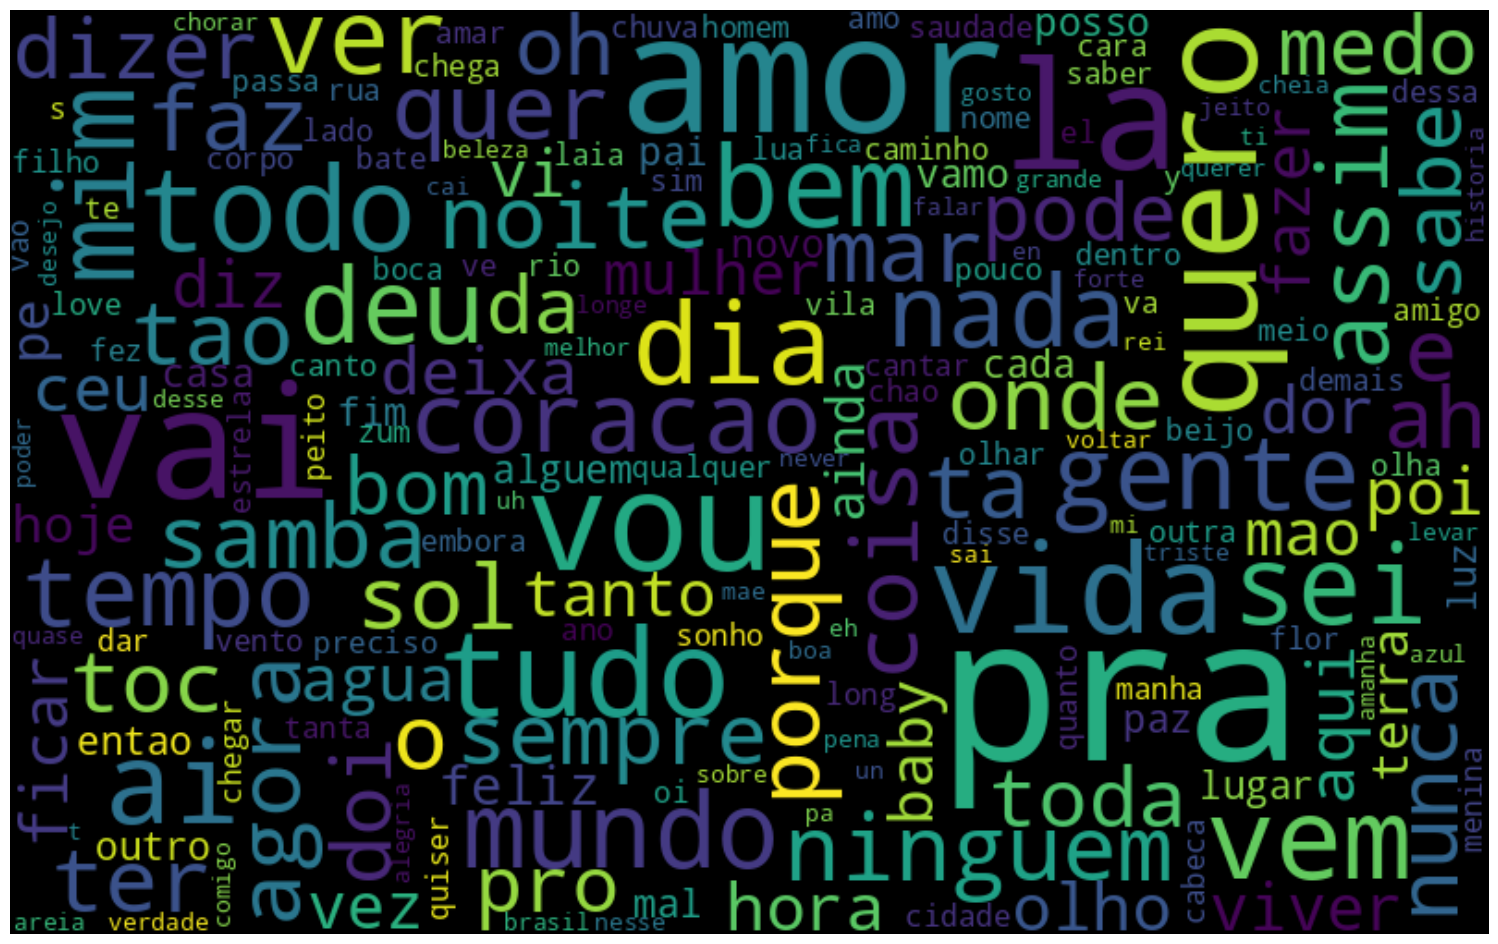

In [13]:
import matplotlib.pyplot as plt

word_cloud = WordCloud(width= 800, height= 500,
                        max_font_size = 110,
                        collocations = False).generate(all_words_string)
# Plotando nuvem de palavras
plt.figure(figsize=(24,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()